# Credit score classification
## 1st milestone

Authors: Zuzanna Piróg, Adrian Zaręba

In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)



## Pobranie zbioru danych

In [2]:
df_original_dataset = pd.read_csv("train.csv")
dataset = df_original_dataset.copy()

In [3]:
#jak wygląda nasz zbiór
dataset.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Opisy kolumn
ID: Unique ID of the record <br>
Customer_ID: Unique ID of the customer <br>
Month: Month of the year <br>
Name: The name of the person <br>
Age: The age of the person <br>
SSN: Social Security Number of the person <br>
Occupation: The occupation of the person <br>
Annual_Income: The Annual Income of the person <br>
Monthly_Inhand_Salary: Monthly in-hand salary of the person <br>
Num_Bank_Accounts: The number of bank accounts of the person <br>
Num_Credit_Card: Number of credit cards the person is having <br>
Interest_Rate: The interest rate on the credit card of the person <br>
Num_of_Loan: The number of loans taken by the person from the bank <br>
Type_of_Loan: The types of loans taken by the person from the bank <br>
Delay_from_due_date: The average number of days delayed by the person from the date of payment <br>
Num_of_Delayed_Payment: Number of payments delayed by the person <br>
Changed_Credit_Card: The percentage change in the credit card limit of the person <br>
Num_Credit_Inquiries: The number of credit card inquiries by the person <br>
Credit_Mix: Classification of Credit Mix of the customer <br>
Outstanding_Debt: The outstanding balance of the person <br>
Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer <br>
Credit_History_Age: The age of the credit history of the person <br>
Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no. <br>
Total_EMI_per_month: The total EMI per month of the person <br>
Amount_invested_monthly: The monthly amount invested by the person <br>
Payment_Behaviour: The payment behaviour of the person <br>
Monthly_Balance: The monthly balance left in the account of the person <br>
Credit_Score: The credit score of the person <br>

## Eksploracyjna analiza danych

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [6]:
dataset.describe(exclude = np.number).T

,count,unique,top,freq
ID,100000,100000,0x3976,1
Customer_ID,100000,12500,CUS_0x1e0f,8
Month,100000,8,August,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [7]:
dataset.isna().sum()
# przy sprawdzeniu mamy informację że credit score nie ma wartóści NA

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

## Podział danych

In [8]:
from sklearn.model_selection import GroupShuffleSplit 

splitter = GroupShuffleSplit(test_size=.30, n_splits=5, random_state = 23)
split = splitter.split(dataset, groups=dataset['Customer_ID'])
train_inds, test_inds = next(split)

train1 = dataset.iloc[train_inds]
main_validate = dataset.iloc[test_inds]

In [9]:
splitter = GroupShuffleSplit(test_size=.30, n_splits=5, random_state = 23)
split = splitter.split(train1, groups=train1['Customer_ID'])
train_inds, test_inds = next(split)

train = train1.iloc[train_inds]
main_validate = train1.iloc[test_inds]

In [10]:
dataset = train


## Zmiana typu danych w kolumnach

In [11]:
#przypomnijmy jakie kolumny są typu object
dataset.select_dtypes('O').info()
#niektóre z nich powinny być zamienione na integer lub float, chociażby w przypadku age lub monthly_balance

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       49000 non-null  object
 1   Customer_ID              49000 non-null  object
 2   Month                    49000 non-null  object
 3   Name                     44071 non-null  object
 4   Age                      49000 non-null  object
 5   SSN                      49000 non-null  object
 6   Occupation               49000 non-null  object
 7   Annual_Income            49000 non-null  object
 8   Num_of_Loan              49000 non-null  object
 9   Type_of_Loan             43624 non-null  object
 10  Num_of_Delayed_Payment   45506 non-null  object
 11  Changed_Credit_Limit     49000 non-null  object
 12  Credit_Mix               49000 non-null  object
 13  Outstanding_Debt         49000 non-null  object
 14  Credit_History_Age       44535 non-nul

In [12]:
#sprawdźmy czy poza wartościami Nan występują jakieś dziwne wartości w tych kolumnach
kolumny_object = dataset.select_dtypes('O').columns
kolumny_object

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [13]:
for kolumna in kolumny_object:
    print("Nazwa kolumny:" + kolumna)
    print("--"*15)
    print(dataset[kolumna].value_counts(dropna = False))
    print("--"*15, '\n')

Nazwa kolumny:ID
------------------------------
0x2045f    1
0x1ab66    1
0x819c     1
0x5d20     1
0x71e3     1
          ..
0xe2bb     1
0x1181f    1
0x1c97a    1
0x2163c    1
0x96e1     1
Name: ID, Length: 49000, dtype: int64
------------------------------ 

Nazwa kolumny:Customer_ID
------------------------------
CUS_0xc6fa    8
CUS_0x15f7    8
CUS_0x8eb2    8
CUS_0xb46f    8
CUS_0x7b3a    8
             ..
CUS_0xab60    8
CUS_0x7b30    8
CUS_0x4fd2    8
CUS_0x49a4    8
CUS_0x1340    8
Name: Customer_ID, Length: 6125, dtype: int64
------------------------------ 

Nazwa kolumny:Month
------------------------------
July        6125
March       6125
May         6125
February    6125
April       6125
January     6125
June        6125
August      6125
Name: Month, dtype: int64
------------------------------ 

Nazwa kolumny:Name
------------------------------
NaN                  4929
Alexei Oreskovics      32
Danielz                31
Michaelr               30
Nickq                  30


Jak możemy zaobserwować jakość naszych danych nie jest idealna.
Zastanawiające wydają się być kolumna Age i jej skrajne wartości, wartości: #F%$D@*&8 w kolumnie security number oraz chociażby !@9#%8 w kolumnie Payment_Behaviour


In [14]:
#Zatem pozbądźmy się ich
dataset = dataset.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ , " ')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

In [15]:
dataset

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,NaN,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [16]:
dataset.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        4929
Age                            0
SSN                         2777
Occupation                  3469
Annual_Income                  0
Monthly_Inhand_Salary       7333
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5376
Delay_from_due_date            0
Num_of_Delayed_Payment      3494
Changed_Credit_Limit        1015
Num_Credit_Inquiries         979
Credit_Mix                  9951
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4465
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2175
Payment_Behaviour           3823
Monthly_Balance              576
Credit_Score                   0
dtype: int64

Jak możemy zauważyć liczba brakujących informacji się zwiększyła ale usunęliśmy mylące informacje

In [17]:
#Teraz zmieńmy typy danych do najlepszego typu dla danej kolumny

#zmiania z hex(szesnastkowy) na system dziesiętny
dataset['ID'] = dataset.ID.apply(lambda x: int(x, 16))
#zmiania z hex(szesnastkowy) na system dziesiętny ale pierwsze cztery znaki w kolumnie nie są liczbowe
dataset['Customer_ID'] = dataset.Customer_ID.apply(lambda x: int(x[4:], 16))
#zmiana formatu czasu
dataset['Month'] = pd.to_datetime(dataset.Month, format='%B').dt.month
#zmiana na int 
dataset['Age'] = dataset.Age.astype(int)  
dataset['Num_of_Loan'] = dataset.Num_of_Loan.astype(int) 
#zmiana na float
dataset['SSN'] = dataset.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float)
dataset['Annual_Income'] = dataset.Annual_Income.astype(float)
dataset['Num_of_Delayed_Payment'] = dataset.Num_of_Delayed_Payment.astype(float)
dataset['Changed_Credit_Limit'] = dataset.Changed_Credit_Limit.astype(float)
dataset['Outstanding_Debt'] = dataset.Outstanding_Debt.astype(float)
dataset['Amount_invested_monthly'] = dataset.Amount_invested_monthly.astype(float)
dataset['Monthly_Balance'] = dataset.Monthly_Balance.astype(float)

In [18]:
#Zmiana zapisu 22 Years and 1 Months

def Zmiana_miesiecy(x):
    #funkcja zwraca wynik w liczbie miesiecy
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return (num1*12)+num2
    else:
        return x

In [19]:
dataset['Credit_History_Age'] = dataset.Credit_History_Age.apply(lambda x: Zmiana_miesiecy(x)).astype(float)
dataset

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265.0,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,-500,821000265.0,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265.0,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,NaN,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,NaN,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.50,3.0,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [20]:
dataset.groupby('Customer_ID')['Credit_History_Age'].apply(list)
#dla danego customer mamy wiele wpisów

Customer_ID
1006     [182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188...
1009     [331.0, 332.0, 333.0, 334.0, 335.0, 336.0, 337...
1013     [311.0, 312.0, 313.0, 314.0, 315.0, 316.0, 317...
1015        [nan, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, nan]
1019     [388.0, 389.0, 390.0, 391.0, 392.0, 393.0, 394...
                               ...                        
50965     [16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0]
50970    [241.0, 242.0, 243.0, 244.0, 245.0, 246.0, 247...
50992    [159.0, 160.0, 161.0, 162.0, 163.0, nan, 165.0...
50996    [206.0, 207.0, 208.0, 209.0, 210.0, 211.0, 212...
50999    [226.0, 227.0, 228.0, 229.0, 230.0, 231.0, 232...
Name: Credit_History_Age, Length: 6125, dtype: object

In [21]:
dataset.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                                       
1006         Credit-Builder Loan, and Payday Loan                                                                                   8
1009         Credit-Builder Loan, Student Loan, Not Specified, and Student Loan                                                     8
1013         Home Equity Loan, Mortgage Loan, Not Specified, and Personal Loan                                                      8
1015         Personal Loan, Mortgage Loan, Not Specified, Auto Loan, Debt Consolidation Loan, Credit-Builder Loan, and Auto Loan    8
1019         Home Equity Loan                                                                                                       8
                                                                                                                                   ..
50965        Home Equity Loan, Student Loan, Payday Loan, Not Speci

In [22]:
dataset.groupby('Customer_ID')['Type_of_Loan'].apply(list)

Customer_ID
1006     [Credit-Builder Loan, and Payday Loan, Credit-...
1009     [Credit-Builder Loan, Student Loan, Not Specif...
1013     [Home Equity Loan, Mortgage Loan, Not Specifie...
1015     [Personal Loan, Mortgage Loan, Not Specified, ...
1019     [Home Equity Loan, Home Equity Loan, Home Equi...
                               ...                        
50965    [Home Equity Loan, Student Loan, Payday Loan, ...
50970    [Auto Loan, Payday Loan, Student Loan, and Pay...
50992    [Student Loan, Credit-Builder Loan, Mortgage L...
50996             [nan, nan, nan, nan, nan, nan, nan, nan]
50999    [Credit-Builder Loan, Credit-Builder Loan, Cre...
Name: Type_of_Loan, Length: 6125, dtype: object

In [23]:
#nietkóre dane znajdujące się w kolumnie są wymienione po przecinku albo po słowie and
#zobaczmy z jakimi kategoriami mamy doczynienia

def get_Diff_Values_Colum(df_column, diff_value = []):   
    column = df_column.dropna()
    for i in column:
        if ',' not in i and i not in diff_value:
            diff_value.append(i)
        else:
            for data in map(lambda x:x.strip(), i.replace('and','').split(',')):
                if not data in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [24]:
get_Diff_Values_Colum(dataset['Type_of_Loan'])

{0: 'Auto Loan',
 1: 'Credit-Builder Loan',
 2: 'Debt Consolidation Loan',
 3: 'Home Equity Loan',
 4: 'Mortgage Loan',
 5: 'Not Specified',
 6: 'Payday Loan',
 7: 'Personal Loan',
 8: 'Student Loan'}

In [25]:
#podsumujmy zmienione typy kolumn:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        49000 non-null  int64  
 1   Customer_ID               49000 non-null  int64  
 2   Month                     49000 non-null  int64  
 3   Name                      44071 non-null  object 
 4   Age                       49000 non-null  int32  
 5   SSN                       46223 non-null  float64
 6   Occupation                45531 non-null  object 
 7   Annual_Income             49000 non-null  float64
 8   Monthly_Inhand_Salary     41667 non-null  float64
 9   Num_Bank_Accounts         49000 non-null  int64  
 10  Num_Credit_Card           49000 non-null  int64  
 11  Interest_Rate             49000 non-null  int64  
 12  Num_of_Loan               49000 non-null  int32  
 13  Type_of_Loan              43624 non-null  object 
 14  Delay_

## EDA (Exploratory Data Analysis)
### kolumny typu object
Wyszukamy wartosci NaN a nastepnie uzupelnimy je na podstawie Costumer_ID Group

In [26]:
def NaN_Values_By_Group(df, groupby, column, inplace = True):
    """funkcja usuwa braki, dzieki zagniezdzonej funkcji oraz wyswietla dane przed i po transformacji dla danej kolumny"""
    def NaN_fill_moda(df, groupby, column, inplace = True):
        """funkcja zmienia lokalny NaN przy pomocy mody"""
        #zmiana None to np.NaN
        if df[column].isin([None]).sum():
            df[column][df[column].isin([None])] = np.NaN
        #zmieniamy przez lokalna moda
        rezultat = df.groupby(groupby)[column].transform(lambda x: x.fillna(stats.mode(x)[0][0]))
        
        #inplace
        if inplace:
            df[column]=rezultat
        else:
            return rezultat
    #Funkcja glowna - wizualizacja
    if inplace:
        #przed zastapieniem wartosci
        x = df[column].value_counts(dropna=False).head(1)
        print(f'\nPrzed zaadresowaniem Nan {column}:', [x if x.index[0] is np.NaN or x.index[0] is None else 'Brak NaN Values'] , end='\n')
        a = df.groupby(groupby)[column].apply(list) 
        print(f'\nPrzyklad przed: {column}:\n', *a.head().values, sep='\n', end='\n')
        
        #zastepujemy
        NaN_fill_moda(df, groupby, column, inplace)
        
        #po zastapieniu wartosci
        y = df[column].value_counts(dropna=False).head(1)
        print(f'\nPo zaadresowaniu NaN {column}:', [y if y.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        b = df.groupby(groupby)[column].apply(list)
        print(f'\nPrzyklad po: {column}:\n', *b.head().values, sep='\n', end='\n')
    else:
        return NaN_fill_moda(df, groupby, column, inplace)

In [27]:
#zobaczmy jak wygladaja blizej kolumny typu object
dataset.describe(include='O').T

,count,unique,top,freq
Name,44071,5498,Alexei Oreskovics,32
Occupation,45531,15,Lawyer,3244
Type_of_Loan,43624,3388,Not Specified,744
Credit_Mix,39049,3,Standard,17816
Payment_of_Min_Amount,49000,3,Yes,25554
Payment_Behaviour,45177,6,Low_spent_Small_value_payments,12384
Credit_Score,49000,3,Standard,26040


Zastosujmy napisana funkcje dla kolumn
#### Name

In [28]:
dataset['Name'].value_counts(dropna=False).head()

NaN                  4929
Alexei Oreskovics      32
Danielz                31
Nickq                  30
Michaelr               30
Name: Name, dtype: int64

In [29]:
NaN_Values_By_Group(dataset, 'Customer_ID', 'Name')


Przed zaadresowaniem Nan Name: [NaN    4929
Name: Name, dtype: int64]

Przyklad przed: Name:

['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', nan]
['Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd']
['Natalie Thomasp', 'Natalie Thomasp', 'Natalie Thomasp', 'Natalie Thomasp', 'Natalie Thomasp', 'Natalie Thomasp', 'Natalie Thomasp', 'Natalie Thomasp']
[nan, 'Kellya', 'Kellya', 'Kellya', 'Kellya', 'Kellya', 'Kellya', 'Kellya']
[nan, 'Taiga Uranakab', 'Taiga Uranakab', 'Taiga Uranakab', 'Taiga Uranakab', 'Taiga Uranakab', 'Taiga Uranakab', 'Taiga Uranakab']

Po zaadresowaniu NaN Name: ['No NaN Value']

Przyklad po: Name:

['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb']
['Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd']
['Natalie Thomasp', 'Natalie Thomasp', 'Na

#### Occupation

In [30]:
dataset['Occupation'].value_counts(dropna=False)

NaN              3469
Lawyer           3244
Media_Manager    3190
Teacher          3170
Engineer         3136
Developer        3113
Scientist        3091
Journalist       3077
Accountant       3076
Entrepreneur     3036
Doctor           3034
Mechanic         3033
Architect        3023
Manager          2911
Musician         2728
Writer           2669
Name: Occupation, dtype: int64

In [31]:
NaN_Values_By_Group(dataset, 'Customer_ID', 'Occupation')


Przed zaadresowaniem Nan Occupation: [NaN    3469
Name: Occupation, dtype: int64]

Przyklad przed: Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', nan, 'Journalist', 'Journalist']
['Accountant', nan, 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant']
[nan, 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic']
['Entrepreneur', 'Entrepreneur', 'Entrepreneur', 'Entrepreneur', 'Entrepreneur', 'Entrepreneur', 'Entrepreneur', 'Entrepreneur']
['Media_Manager', 'Media_Manager', nan, 'Media_Manager', 'Media_Manager', 'Media_Manager', 'Media_Manager', 'Media_Manager']

Po zaadresowaniu NaN Occupation: ['No NaN Value']

Przyklad po: Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist']
['Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant']
['Mechanic', 'Mechanic', 'Mecha

#### Type_of_Loan

In [32]:
dataset.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                                       
1006         Credit-Builder Loan, and Payday Loan                                                                                   8
1009         Credit-Builder Loan, Student Loan, Not Specified, and Student Loan                                                     8
1013         Home Equity Loan, Mortgage Loan, Not Specified, and Personal Loan                                                      8
1015         Personal Loan, Mortgage Loan, Not Specified, Auto Loan, Debt Consolidation Loan, Credit-Builder Loan, and Auto Loan    8
1019         Home Equity Loan                                                                                                       8
                                                                                                                                   ..
50965        Home Equity Loan, Student Loan, Payday Loan, Not Speci

In [33]:
dataset['Type_of_Loan'].replace([np.NaN], 'Not Specified', inplace=True)

#### Credit_Mix

In [34]:
dataset['Credit_Mix'].value_counts(dropna=False)

Standard    17816
Good        12029
NaN          9951
Bad          9204
Name: Credit_Mix, dtype: int64

In [35]:
NaN_Values_By_Group(dataset, 'Customer_ID', 'Credit_Mix')


Przed zaadresowaniem Nan Credit_Mix: ['Brak NaN Values']

Przyklad przed: Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', nan, 'Standard', 'Standard']
['Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
[nan, 'Good', nan, 'Good', 'Good', nan, 'Good', nan]
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', nan, nan]
[nan, nan, 'Good', 'Good', 'Good', 'Good', 'Good', 'Good']

Po zaadresowaniu NaN Credit_Mix: ['No NaN Value']

Przyklad po: Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good']


#### Payment_of_Min_Amount

In [36]:
dataset['Payment_of_Min_Amount'].value_counts(dropna=False)
#nie musimy nic robic

Yes    25554
No     17534
NM      5912
Name: Payment_of_Min_Amount, dtype: int64

#### Payment_Behaviour

In [37]:
dataset['Payment_Behaviour'].value_counts(dropna=False)

Low_spent_Small_value_payments      12384
High_spent_Medium_value_payments     8591
Low_spent_Medium_value_payments      6823
High_spent_Large_value_payments      6757
High_spent_Small_value_payments      5486
Low_spent_Large_value_payments       5136
NaN                                  3823
Name: Payment_Behaviour, dtype: int64

In [38]:
NaN_Values_By_Group(dataset, 'Customer_ID', 'Payment_Behaviour')


Przed zaadresowaniem Nan Payment_Behaviour: ['Brak NaN Values']

Przyklad przed: Payment_Behaviour:

['High_spent_Medium_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', nan, 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments']
['High_spent_Medium_value_payments', 'High_spent_Large_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments', nan, 'High_spent_Large_value_payments']
['High_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Large_value_payments', nan, 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments']
['Low_spent_Small_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_La

### Min-Max wartosci w kolumnach numerycznych oraz braki NaN

In [39]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,49000.0,8.083858e+04,4.288649e+04,5.634000e+03,4.401175e+04,8.094950e+04,1.178152e+05,1.556290e+05
Customer_ID,49000.0,2.581361e+04,1.429628e+04,1.006000e+03,1.353700e+04,2.560700e+04,3.812000e+04,5.099900e+04
Month,49000.0,4.500000e+00,2.291311e+00,1.000000e+00,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,49000.0,1.087499e+02,6.732636e+02,-5.000000e+02,2.400000e+01,3.300000e+01,4.200000e+01,8.697000e+03
SSN,46223.0,5.020342e+08,2.903772e+08,5.805680e+05,2.525726e+08,5.021419e+08,7.560222e+08,9.997990e+08
Annual_Income,49000.0,1.752482e+05,1.429301e+06,7.006520e+03,1.939650e+04,3.765418e+04,7.345503e+04,2.418881e+07
Monthly_Inhand_Salary,41667.0,4.227556e+03,3.203741e+03,3.335967e+02,1.628208e+03,3.116314e+03,6.047488e+03,1.520463e+04
Num_Bank_Accounts,49000.0,1.764637e+01,1.213955e+02,-1.000000e+00,3.000000e+00,6.000000e+00,7.000000e+00,1.794000e+03
Num_Credit_Card,49000.0,2.222531e+01,1.282394e+02,0.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00,1.499000e+03
Interest_Rate,49000.0,7.277700e+01,4.648605e+02,1.000000e+00,7.000000e+00,1.300000e+01,2.000000e+01,5.788000e+03


In [40]:
#liczba klientow w bazie banku
dataset['Customer_ID'].nunique()

6125

In [41]:
#Sprawdzamy Outliery
def znajdz_iqr_dolne_gorne(df, column, multiply=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 -q1
    
    lower = q1-iqr*multiply
    upper = q3+iqr*multiply
    affect = df.loc[(df[column]<lower)|(df[column]>upper)].shape
    print('Outliers:', affect)
    return lower, upper

In [42]:
def nowe_numeryczne_grupowe_wartosci(df, groupby, column, inplace=True):      
    import scipy.stats as stats 

    #znajdujemy zakres min i max w kolumnie
    def get_group_min_max(df, groupby, column):            
        cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = cur.apply(lambda x: stats.mode(x)).apply([min, max])
        return x[0][0], y[0][0]
    
   #zmieniamy na najczestsza wartosc
    def make_group_NaN_and_fill_mode(df, groupby, column, inplace=True):
        df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
        mini, maxi = x[0][0], y[0][0]

        # zmieniamy zle wartosci na Nan
        col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x)

        # zastepujemy lokalna moda
        mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
        result = col.fillna(mode_by_group)

        # inplace
        if inplace:
            df[column]=result
        else:
            return result
        
    
    # glowna funckja - wizualizacja     
    if inplace:   
        print("\nIstniejace Min, Max wartosci:", df[column].apply([min, max]), sep='\n', end='\n')       
        mini, maxi = get_group_min_max(df, groupby, column)        
        print(f"\nGroupby by {groupby}'s Aktualne min, max wartosci:", f'min:\t{mini},\nmax:\t{ maxi}', sep='\n', end='\n')
        
        # Before Assigning Wrong values      
        x = df[column].value_counts(dropna=False).head(1)
        print(f'\nPrzed zmiana Min, Max {column}:', [x if x.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        
        a = df.groupby(groupby)[column].apply(list) 
        print(f'\nPrzyklad przed {column}:\n', *a.head().values, sep='\n', end='\n')
        
        # Assigning
        make_group_NaN_and_fill_mode(df, groupby, column, inplace)
        
        # After Assigning Wrong values
        y = df[column].value_counts(dropna=False).head(1)
        print(f'\nPo zmianie  Min, Max {column}:', [y if y.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        
        b = df.groupby(groupby)[column].apply(list)
        print(f'\nPrzyklad po {column}:\n', *b.head().values, sep='\n', end='\n')
    else:   
        # Show
        return make_group_NaN_and_fill_mode(df, groupby, column, inplace)

#### ID

In [43]:
dataset['ID'].nunique()

49000

#### Month

In [44]:
dataset['Month'].value_counts()
#wszystko w porzadku bo kazdy uzytkownik ma dane dla osmiu miesiecy

1    6125
2    6125
3    6125
4    6125
5    6125
6    6125
7    6125
8    6125
Name: Month, dtype: int64

#### Age

In [45]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Age')


Istniejace Min, Max wartosci:
min    -500
max    8697
Name: Age, dtype: int64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	14,
max:	56

Przed zmiana Min, Max Age: ['No NaN Value']

Przyklad przed Age:

[37, 38, 38, 8153, 38, 38, 38, 38]
[22, 22, 22, 22, 22, 22, 22, 23]
[30, 30, 30, 30, 30, 30, 30, 30]
[25, 25, 25, 25, 25, 25, 25, 25]
[30, 30, 30, 30, 30, 31, 31, 31]

Po zmianie  Min, Max Age: ['No NaN Value']

Przyklad po Age:

[37.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0]
[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0]
[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0]
[25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0]
[30.0, 30.0, 30.0, 30.0, 30.0, 31.0, 31.0, 31.0]


#### SSN

In [46]:
dataset.SSN.value_counts(dropna=False)

NaN            2777
17646143.0        8
578881975.0       8
691363623.0       8
441545666.0       8
               ... 
68834394.0        5
642737670.0       4
286449634.0       4
753722651.0       4
331281921.0       4
Name: SSN, Length: 6126, dtype: int64

In [47]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'SSN')


Istniejace Min, Max wartosci:
min       580568.0
max    999799012.0
Name: SSN, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	580568.0,
max:	999799012.0

Przed zmiana Min, Max SSN: ['No NaN Value']

Przyklad przed SSN:

[354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0]
[nan, nan, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0]
[335624040.0, 335624040.0, 335624040.0, 335624040.0, 335624040.0, 335624040.0, 335624040.0, 335624040.0]
[966789490.0, 966789490.0, 966789490.0, 966789490.0, 966789490.0, 966789490.0, 966789490.0, 966789490.0]
[155762267.0, 155762267.0, 155762267.0, 155762267.0, 155762267.0, 155762267.0, 155762267.0, 155762267.0]

Po zmianie  Min, Max SSN: ['No NaN Value']

Przyklad po SSN:

[354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0]
[891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189

#### Annual income

In [48]:
dataset.Annual_Income.value_counts(dropna=False)

32543.38       16
20867.67       16
95596.35       15
10361.92        8
31305.26        8
               ..
20085482.00     1
11845938.00     1
10366883.00     1
23917742.00     1
21246612.00     1
Name: Annual_Income, Length: 6595, dtype: int64

In [49]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Annual_Income')


Istniejace Min, Max wartosci:
min        7006.52
max    24188807.00
Name: Annual_Income, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	7006.52,
max:	179987.28

Przed zmiana Min, Max Annual_Income: ['No NaN Value']

Przyklad przed Annual_Income:

[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18]
[80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64]
[30022.71, 30022.71, 30022.71, 30022.71, 30022.71, 30022.71, 30022.71, 30022.71]
[26104.48, 26104.48, 26104.48, 26104.48, 26104.48, 26104.48, 26104.48, 26104.48]
[14432.87, 14432.87, 14432.87, 14432.87, 14432.87, 14432.87, 14432.87, 14432.87]

Po zmianie  Min, Max Annual_Income: ['No NaN Value']

Przyklad po Annual_Income:

[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18]
[80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64]
[30022.71, 30022.71, 30022.71, 30022.71, 30022.71, 30022.71, 30022.71, 3002

#### Monthly_Inhand_Salary

In [50]:
dataset.Monthly_Inhand_Salary.value_counts(dropna=False)

NaN            7333
6082.187500      15
6358.956667      15
536.431250       12
5620.681667       8
               ... 
1371.684255       1
3415.781667       1
5977.952490       1
2728.017745       1
3916.657500       1
Name: Monthly_Inhand_Salary, Length: 6487, dtype: int64

In [51]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Monthly_Inhand_Salary')


Istniejace Min, Max wartosci:
min      333.596667
max    15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	333.5966666666667,
max:	15204.633333333331

Przed zmiana Min, Max Monthly_Inhand_Salary: ['No NaN Value']

Przyklad przed Monthly_Inhand_Salary:

[1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334]
[6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666]
[2684.8925, nan, 2684.8925, 2684.8925, 2684.8925, 2684.8925, 2684.8925, 2684.8925]
[1995.3733333333328, 1995.3733333333328, 1995.3733333333328, 1995.3733333333328, 1995.3733333333328, 1995.3733333333328, 1995.3733333333328, 1995.3733333333328]
[1185.7391666666667, 1185.7391666666667, 1185.7391666666667, 1185.7391666666667, 1185.7391666666667, 1185.7391666666667, 1

#### Num_Bank_Accounts

In [52]:
dataset.Num_Bank_Accounts.value_counts(dropna=False)

8       6406
6       6223
7       6173
4       6139
3       5918
        ... 
11         1
1770       1
1578       1
1418       1
1695       1
Name: Num_Bank_Accounts, Length: 572, dtype: int64

In [53]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Num_Bank_Accounts')


Istniejace Min, Max wartosci:
min      -1
max    1794
Name: Num_Bank_Accounts, dtype: int64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	-1,
max:	10

Przed zmiana Min, Max Num_Bank_Accounts: ['No NaN Value']

Przyklad przed Num_Bank_Accounts:

[9, 9, 9, 9, 9, 9, 9, 9]
[6, 6, 6, 6, 6, 6, 6, 6]
[3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3]

Po zmianie  Min, Max Num_Bank_Accounts: ['No NaN Value']

Przyklad po Num_Bank_Accounts:

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


#### Num_Credit_Card

In [54]:
dataset.Num_Credit_Card.value_counts(dropna=False)

5       8857
7       8267
6       8117
4       6976
3       6701
        ... 
592        1
1125       1
464        1
304        1
240        1
Name: Num_Credit_Card, Length: 783, dtype: int64

In [55]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Num_Credit_Card')


Istniejace Min, Max wartosci:
min       0
max    1499
Name: Num_Credit_Card, dtype: int64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0,
max:	11

Przed zmiana Min, Max Num_Credit_Card: ['No NaN Value']

Przyklad przed Num_Credit_Card:

[6, 6, 6, 6, 6, 6, 6, 6]
[3, 3, 3, 3, 725, 3, 3, 3]
[7, 7, 7, 7, 7, 7, 7, 7]
[4, 4, 37, 4, 4, 4, 4, 4]
[7, 7, 7, 7, 7, 7, 7, 7]

Po zmianie  Min, Max Num_Credit_Card: ['No NaN Value']

Przyklad po Num_Credit_Card:

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]


#### Interest_Rate

In [56]:
dataset.Interest_Rate.value_counts(dropna=False)

5       2532
8       2408
6       2334
11      2286
12      2229
        ... 
5262       1
1292       1
1580       1
5710       1
2015       1
Name: Interest_Rate, Length: 951, dtype: int64

In [57]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Interest_Rate')


Istniejace Min, Max wartosci:
min       1
max    5788
Name: Interest_Rate, dtype: int64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	1,
max:	34

Przed zmiana Min, Max Interest_Rate: ['No NaN Value']

Przyklad przed Interest_Rate:

[22, 22, 22, 22, 22, 22, 22, 22]
[15, 15, 15, 15, 15, 15, 15, 15]
[6, 6, 6, 6, 2056, 6, 6, 6]
[14, 14, 14, 14, 14, 14, 14, 14]
[7, 7, 7, 7, 7, 7, 7, 7]

Po zmianie  Min, Max Interest_Rate: ['No NaN Value']

Przyklad po Interest_Rate:

[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]
[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]


#### Num_of_Loan

In [58]:
dataset.Num_of_Loan.value_counts(dropna=False)

3       7506
4       7482
2       7466
0       5163
1       5081
        ... 
1387       1
1419       1
492        1
684        1
1311       1
Name: Num_of_Loan, Length: 224, dtype: int64

In [59]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Num_of_Loan')


Istniejace Min, Max wartosci:
min    -100
max    1496
Name: Num_of_Loan, dtype: int64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0,
max:	9

Przed zmiana Min, Max Num_of_Loan: ['No NaN Value']

Przyklad przed Num_of_Loan:

[2, 2, 2, 2, 2, 2, 2, 2]
[4, 4, 4, 4, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 4]
[7, 7, 7, 7, 7, 7, 7, 7]
[1, 1, -100, 1, 1, 1, 1, 1]

Po zmianie  Min, Max Num_of_Loan: ['No NaN Value']

Przyklad po Num_of_Loan:

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


####  Delay_from_due_date

In [60]:
dataset.Delay_from_due_date.value_counts(dropna=False)

 15    1829
 13    1702
 10    1680
 8     1651
 7     1638
       ... 
-4       28
 65      23
-5       19
 66      18
 67      10
Name: Delay_from_due_date, Length: 73, dtype: int64

In [61]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Delay_from_due_date')


Istniejace Min, Max wartosci:
min    -5
max    67
Name: Delay_from_due_date, dtype: int64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	-4,
max:	62

Przed zmiana Min, Max Delay_from_due_date: ['No NaN Value']

Przyklad przed Delay_from_due_date:

[48, 48, 48, 48, 48, 48, 48, 48]
[19, 19, 19, 19, 19, 19, 19, 19]
[9, 12, 4, 14, 9, 12, 9, 9]
[13, 11, 11, 11, 11, 11, 11, 11]
[4, 5, 7, 2, 8, 5, 5, 5]

Po zmianie  Min, Max Delay_from_due_date: ['No NaN Value']

Przyklad po Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0]
[9.0, 12.0, 4.0, 14.0, 9.0, 12.0, 9.0, 9.0]
[13.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0]
[4.0, 5.0, 7.0, 2.0, 8.0, 5.0, 5.0, 5.0]


#### Num_of_Delayed_Payment

In [62]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Num_of_Delayed_Payment')


Istniejace Min, Max wartosci:
min      -3.0
max    4388.0
Name: Num_of_Delayed_Payment, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	-2.0,
max:	28.0

Przed zmiana Min, Max Num_of_Delayed_Payment: ['No NaN Value']

Przyklad przed Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, nan, 12.0, 11.0, 12.0]
[18.0, 18.0, 18.0, 18.0, 18.0, nan, 20.0, 18.0]
[2.0, 2.0, 2.0, 5.0, 2.0, 2.0, 2.0, 2.0]
[14.0, 16.0, 14.0, 15.0, 14.0, 14.0, 14.0, 14.0]
[8.0, 8.0, 7.0, 8.0, 5.0, 8.0, 11.0, 8.0]

Po zmianie  Min, Max Num_of_Delayed_Payment: ['No NaN Value']

Przyklad po Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0]
[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 20.0, 18.0]
[2.0, 2.0, 2.0, 5.0, 2.0, 2.0, 2.0, 2.0]
[14.0, 16.0, 14.0, 15.0, 14.0, 14.0, 14.0, 14.0]
[8.0, 8.0, 7.0, 8.0, 5.0, 8.0, 11.0, 8.0]


#### Changed_Credit_Limit

In [63]:
dataset.Changed_Credit_Limit.value_counts(dropna=False)

 NaN      1015
 8.87       70
 7.33       69
 9.94       69
 9.25       68
          ... 
 25.95       1
-1.24        1
-0.39        1
 12.76       1
 27.24       1
Name: Changed_Credit_Limit, Length: 3799, dtype: int64

In [64]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Changed_Credit_Limit')


Istniejace Min, Max wartosci:
min    -6.48
max    36.97
Name: Changed_Credit_Limit, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	-0.7999999999999998,
max:	29.98

Przed zmiana Min, Max Changed_Credit_Limit: ['No NaN Value']

Przyklad przed Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66]
[16.91, 16.91, 16.91, 16.91, 16.91, 16.91, 19.91, 16.91]
[3.06, 3.06, 3.06, 2.06, 3.06, 3.06, 3.06, 3.06]
[10.51, 10.51, 6.51, nan, 10.51, 10.51, 10.51, 10.51]
[9.47, 9.47, 9.47, 16.47, 9.47, 9.47, 9.47, 9.47]

Po zmianie  Min, Max Changed_Credit_Limit: ['No NaN Value']

Przyklad po Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66]
[16.91, 16.91, 16.91, 16.91, 16.91, 16.91, 19.91, 16.91]
[3.06, 3.06, 3.06, 2.06, 3.06, 3.06, 3.06, 3.06]
[10.51, 10.51, 6.51, 10.51, 10.51, 10.51, 10.51, 10.51]
[9.47, 9.47, 9.47, 16.47, 9.47, 9.47, 9.47, 9.47]


#### Num_Credit_Inquiries

In [65]:
dataset.Num_Credit_Inquiries.value_counts(dropna=False)

4.0       5393
3.0       4435
2.0       4081
8.0       3945
6.0       3887
          ... 
1748.0       1
1008.0       1
1172.0       1
2112.0       1
484.0        1
Name: Num_Credit_Inquiries, Length: 667, dtype: int64

In [66]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Num_Credit_Inquiries')


Istniejace Min, Max wartosci:
min       0.0
max    2597.0
Name: Num_Credit_Inquiries, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0.0,
max:	17.0

Przed zmiana Min, Max Num_Credit_Inquiries: ['No NaN Value']

Przyklad przed Num_Credit_Inquiries:

[nan, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[6.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]

Po zmianie  Min, Max Num_Credit_Inquiries: ['No NaN Value']

Przyklad po Num_Credit_Inquiries:

[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[6.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


#### Outstanding_Debt

In [67]:
dataset.Outstanding_Debt.value_counts(dropna=False)

402.54     16
454.40     16
768.69     16
1024.56    16
832.55     16
           ..
598.94      8
1497.20     8
4649.55     8
1860.55     8
1189.30     8
Name: Outstanding_Debt, Length: 6049, dtype: int64

In [68]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Outstanding_Debt')


Istniejace Min, Max wartosci:
min       0.23
max    4998.07
Name: Outstanding_Debt, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0.23,
max:	4998.07

Przed zmiana Min, Max Outstanding_Debt: ['No NaN Value']

Przyklad przed Outstanding_Debt:

[1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73]
[982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44]
[1071.33, 1071.33, 1071.33, 1071.33, 1071.33, 1071.33, 1071.33, 1071.33]
[377.32, 377.32, 377.32, 377.32, 377.32, 377.32, 377.32, 377.32]
[941.79, 941.79, 941.79, 941.79, 941.79, 941.79, 941.79, 941.79]

Po zmianie  Min, Max Outstanding_Debt: ['No NaN Value']

Przyklad po Outstanding_Debt:

[1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73]
[982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44]
[1071.33, 1071.33, 1071.33, 1071.33, 1071.33, 1071.33, 1071.33, 1071.33]
[377.32, 377.32, 377.32, 377.32, 377.32, 377.32, 377.32, 377.32]
[941.79, 941.79, 941.79

#### Credit_Utilization_Ratio

In [69]:
dataset.Credit_Utilization_Ratio.value_counts(dropna=False)

25.980072    1
26.965917    1
36.219379    1
30.412513    1
38.226867    1
            ..
22.252865    1
33.331979    1
31.973580    1
31.806838    1
27.272208    1
Name: Credit_Utilization_Ratio, Length: 49000, dtype: int64

In [70]:
dataset.Credit_Utilization_Ratio.isna().sum()

0

#### Credit_History_Age

In [71]:
dataset.Credit_History_Age.value_counts(dropna=False)

NaN      4465
215.0     225
231.0     222
232.0     221
213.0     218
         ... 
4.0        18
403.0      10
404.0      10
3.0         9
2.0         6
Name: Credit_History_Age, Length: 404, dtype: int64

In [72]:
dataset['Credit_History_Age'] = dataset.groupby('Customer_ID')['Credit_History_Age'].apply(lambda x: x.interpolate().bfill().ffill())

#### Total_EMI_per_month

In [73]:
dataset.Total_EMI_per_month.value_counts(dropna=False)

0.000000        5008
164.859426         8
154.142311         8
25.590900          8
94.536450          8
                ... 
28122.000000       1
56745.000000       1
47946.000000       1
35102.000000       1
3970.000000        1
Name: Total_EMI_per_month, Length: 7386, dtype: int64

In [74]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Total_EMI_per_month')


Istniejace Min, Max wartosci:
min        0.0
max    82331.0
Name: Total_EMI_per_month, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0.0,
max:	1701.9550125306778

Przed zmiana Min, Max Total_EMI_per_month: ['No NaN Value']

Przyklad przed Total_EMI_per_month:

[27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 32972.0]
[188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543]
[62.22228530782847, 62.22228530782847, 62.22228530782847, 62.22228530782847, 62.22228530782847, 62.22228530782847, 62.22228530782847, 62.22228530782847]
[87.21995047930777, 87.21995047930777, 87.21995047930777, 87.21995047930777, 87.21995047930777, 87.21995047930777, 87.21995047930777, 87.21995047930777]
[6.412118995076589, 6.412118995076589, 6.412118995076589, 6.412118995076589, 6.412118995076589, 6.41

#### Amount_invested_monthly

In [75]:
dataset.Amount_invested_monthly.value_counts(dropna=False)

NaN             2175
10000.000000    2081
0.000000          74
73.773683          1
49.756496          1
                ... 
121.971690         1
847.804762         1
75.249729          1
170.519742         1
122.148451         1
Name: Amount_invested_monthly, Length: 44673, dtype: int64

In [76]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Amount_invested_monthly')


Istniejace Min, Max wartosci:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	0.0,
max:	10000.0

Przed zmiana Min, Max Amount_invested_monthly: ['No NaN Value']

Przyklad przed Amount_invested_monthly:

[45.30106826949194, 90.07842318605292, 61.73271462991577, 56.4949816634165, 51.726244263612, 60.82828780912217, 95.6486475869488, 66.71824831147686]
[149.37725143584314, 146.97809602243544, 101.12020124815511, 492.3974911743151, 264.1791118544216, 261.69017894140734, 200.64143588981403, 126.07161584554541]
[164.9626791792366, 53.342282361802475, 92.89928631391052, 233.30783669168176, 66.40475388557067, 177.51732762102978, 81.38944379297384, 75.81759135579897]
[266.79130456470403, 91.99160112641896, 209.5676322013134, 125.62867445388686, 56.74121737862093, nan, 32.228848345610345, 33.625350168417896]
[155.4804636900784, 109.31522552748592, 106.61501509365064, 10000.0, 107.02836982598713, 38.6040022747

#### Monthly_Balance

In [77]:
dataset.Monthly_Balance.value_counts(dropna=False)

 NaN             576
-3.333333e+26      3
 3.108251e+02      1
 3.250919e+02      1
 4.303543e+02      1
                ... 
 3.535814e+02      1
 6.005623e+02      1
 5.914696e+02      1
 2.777354e+02      1
 7.819347e+02      1
Name: Monthly_Balance, Length: 48423, dtype: int64

In [78]:
nowe_numeryczne_grupowe_wartosci(dataset, 'Customer_ID', 'Monthly_Balance')


Istniejace Min, Max wartosci:
min   -3.333333e+26
max    1.602041e+03
Name: Monthly_Balance, dtype: float64

Groupby by Customer_ID's Aktualne min, max wartosci:
min:	-3.333333333333333e+26,
max:	1049.5498607490142

Przed zmiana Min, Max Monthly_Balance: ['No NaN Value']

Przyklad przed Monthly_Balance:

[310.39167595729333, 295.61432104073225, 333.9600295968694, 309.1977625633686, 323.9664999631732, 334.864456417663, 280.04409663983637, 328.97449591530835]
[581.4298200072883, 573.8289754206959, 629.6868701949761, 258.40958026881617, 496.6279595887097, 489.116892501724, 560.1656355533173, 594.7354555975859]
[301.30428551293494, 402.924682330369, 403.367678378261, 242.95912800048976, 399.8622108066008, 298.74963707114176, 404.8775208991977, 400.4493733363725]
[135.52607828932156, 280.32578172760657, 192.74975065271218, 256.68870840013875, 325.57616547540465, 300.7194936688948, 330.08853450841525, 328.69203268560767]
[246.6813339815117, 292.8465721441042, 295.54678257793944, 293.4329461

### Sprawdźmy jak wyglądają dane po tym etapie czyszczenia

In [79]:
dataset

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",23.0,7.0,11.50,3.0,Good,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18.0,7.0,11.50,3.0,Good,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",27.0,6.0,11.50,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",20.0,6.0,11.50,3.0,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [80]:
dataset.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        49000 non-null  int64  
 1   Customer_ID               49000 non-null  int64  
 2   Month                     49000 non-null  int64  
 3   Name                      49000 non-null  object 
 4   Age                       49000 non-null  float64
 5   SSN                       49000 non-null  float64
 6   Occupation                49000 non-null  object 
 7   Annual_Income             49000 non-null  float64
 8   Monthly_Inhand_Salary     49000 non-null  float64
 9   Num_Bank_Accounts         49000 non-null  float64
 10  Num_Credit_Card           49000 non-null  float64
 11  Interest_Rate             49000 non-null  float64
 12  Num_of_Loan               49000 non-null  float64
 13  Type_of_Loan              49000 non-null  object 
 14  Delay_

## Preprocessing

- Num_Bank_Accounts,

- Delay_from_due_date,
- Num_of_Delayed_Payment,
- Monthly_Balance ma ujemne liczby które musmy sprawdzić
- Amount_invested_monthly ma również jeszcze podejrzane wyniki


### Num_Bank_Accounts

In [82]:
dataset[dataset['Num_Bank_Accounts']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
55636,89086,22931,5,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,-1.0,5.0,7.0,1.0,Student Loan,8.0,3.0,10.11,0.0,Good,644.57,25.532001,285.0,NM,16.483566,126.665345,Low_spent_Medium_value_payments,368.585338,Standard
55637,89087,22931,6,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,Student Loan,8.0,3.0,5.11,0.0,Good,644.57,31.813259,286.0,No,16.483566,54.821327,High_spent_Large_value_payments,400.429357,Standard
55638,89088,22931,7,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,Student Loan,11.0,3.0,9.11,0.0,Good,644.57,26.574175,287.0,No,16.483566,64.860838,High_spent_Small_value_payments,400.389846,Standard
55639,89089,22931,8,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,Student Loan,8.0,4.0,7.11,0.0,Good,644.57,32.937399,288.0,No,16.483566,89.622962,High_spent_Medium_value_payments,375.627721,Standard


In [83]:
#Jacy Costumers mają ujemną liczbę kont bankowych
dataset[dataset['Num_Bank_Accounts']<0]['Customer_ID'].unique()

array([22931], dtype=int64)

In [84]:
#Przyjrzyjmy się bliżej jednemu z nich
dataset[dataset['Customer_ID']==22931]
#faktycznie nie mają oni kont banakowych 

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
55632,89082,22931,1,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,Student Loan,8.0,3.0,9.11,0.0,Good,644.57,37.488977,281.0,No,16.483566,187.641645,Low_spent_Small_value_payments,317.609039,Standard
55633,89083,22931,2,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,Student Loan,5.0,3.0,9.11,0.0,Good,644.57,30.230648,282.0,No,16.483566,143.322972,High_spent_Small_value_payments,331.927711,Standard
55634,89084,22931,3,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,Student Loan,12.0,3.0,9.11,0.0,Good,644.57,38.822428,283.0,No,16.483566,60.681956,High_spent_Small_value_payments,414.568728,Standard
55635,89085,22931,4,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,Student Loan,8.0,3.0,9.11,0.0,Good,644.57,36.351893,284.0,NM,16.483566,54.569799,High_spent_Large_value_payments,400.680884,Standard
55636,89086,22931,5,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,-1.0,5.0,7.0,1.0,Student Loan,8.0,3.0,10.11,0.0,Good,644.57,25.532001,285.0,NM,16.483566,126.665345,Low_spent_Medium_value_payments,368.585338,Standard
55637,89087,22931,6,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,Student Loan,8.0,3.0,5.11,0.0,Good,644.57,31.813259,286.0,No,16.483566,54.821327,High_spent_Large_value_payments,400.429357,Standard
55638,89088,22931,7,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,Student Loan,11.0,3.0,9.11,0.0,Good,644.57,26.574175,287.0,No,16.483566,64.860838,High_spent_Small_value_payments,400.389846,Standard
55639,89089,22931,8,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,Student Loan,8.0,4.0,7.11,0.0,Good,644.57,32.937399,288.0,No,16.483566,89.622962,High_spent_Medium_value_payments,375.627721,Standard


In [85]:
#zmienmy ujemne numery na 0 
dataset.loc[dataset['Num_Bank_Accounts']<0, 'Num_Bank_Accounts'] = 0

In [86]:
dataset.loc[dataset['Amount_invested_monthly']>=10000, 'Amount_invested_monthly'] = None

<AxesSubplot:>

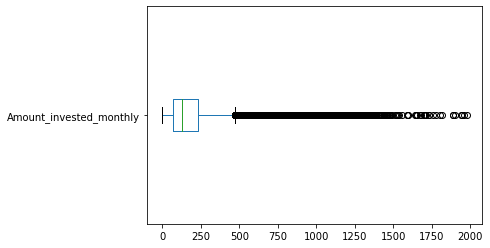

In [87]:
dataset['Amount_invested_monthly'].plot(kind='box', vert=0)


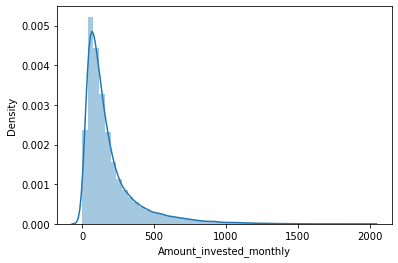

In [88]:
import seaborn as sns
sns.distplot(dataset['Amount_invested_monthly']);

In [89]:
#uzpelniamy grupową modą
dataset['Amount_invested_monthly'] = dataset.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

In [90]:
#sprawdzenie danych trreningowych
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        49000 non-null  int64  
 1   Customer_ID               49000 non-null  int64  
 2   Month                     49000 non-null  int64  
 3   Name                      49000 non-null  object 
 4   Age                       49000 non-null  float64
 5   SSN                       49000 non-null  float64
 6   Occupation                49000 non-null  object 
 7   Annual_Income             49000 non-null  float64
 8   Monthly_Inhand_Salary     49000 non-null  float64
 9   Num_Bank_Accounts         49000 non-null  float64
 10  Num_Credit_Card           49000 non-null  float64
 11  Interest_Rate             49000 non-null  float64
 12  Num_of_Loan               49000 non-null  float64
 13  Type_of_Loan              49000 non-null  object 
 14  Delay_

## Usuwanie zbędnych kolumn

In [91]:
colToDel = ['ID', 'Name', 'SSN']
dataset = dataset.drop(columns=colToDel)

## One - hot encoding

In [92]:
StringToArray = ''
records = dataset['Type_of_Loan'].unique().tolist()
records = [str(x) for x in records]
mainTypes = [x for x in records if not(',' in x)] # Korzystamy z ',' bo tym znakiem są rozdzielane wartości
mainTypes

['Credit-Builder Loan',
 'Not Specified',
 'Debt Consolidation Loan',
 'Auto Loan',
 'Student Loan',
 'Personal Loan',
 'Home Equity Loan',
 'Payday Loan',
 'Mortgage Loan']

In [93]:
for i in mainTypes : 
    dataset[i] = dataset['Type_of_Loan'].str.contains(i)

del dataset['Type_of_Loan']

In [94]:
dataset = dataset.loc[:, dataset.columns.notnull()]

In [95]:
columns_new = ['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'
        , 'Credit-Builder Loan', 'Not Specified',
       'Debt Consolidation Loan', 'Auto Loan', 'Home Equity Loan',
       'Student Loan', 'Personal Loan', 'Payday Loan', 'Mortgage Loan','Credit_Score']

In [96]:
dataset = dataset.reindex(columns=columns_new)

In [97]:
dataset.drop(columns=['Customer_ID'], inplace=True)
dataset.drop(columns=['Month'], inplace=True)

In [98]:
dataset = dataset[dataset['Credit_Score'].notna()]
dataset.shape

(49000, 31)

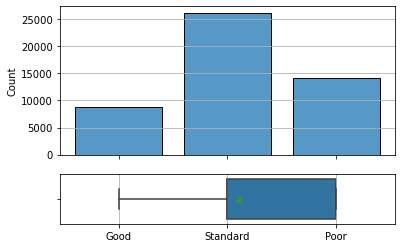

In [99]:
# Rozklad przewidywanych wynikow
import seaborn as sns
import matplotlib.pyplot as plt
fig, (hist, box) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
sns.histplot(dataset['Credit_Score'], discrete=True, stat='count', shrink=.8, kde=False, ax=hist).grid(axis='y')

sns.boxplot(pd.factorize(dataset['Credit_Score'])[0], ax=box, showmeans=True).grid(axis='x')

<AxesSubplot:>

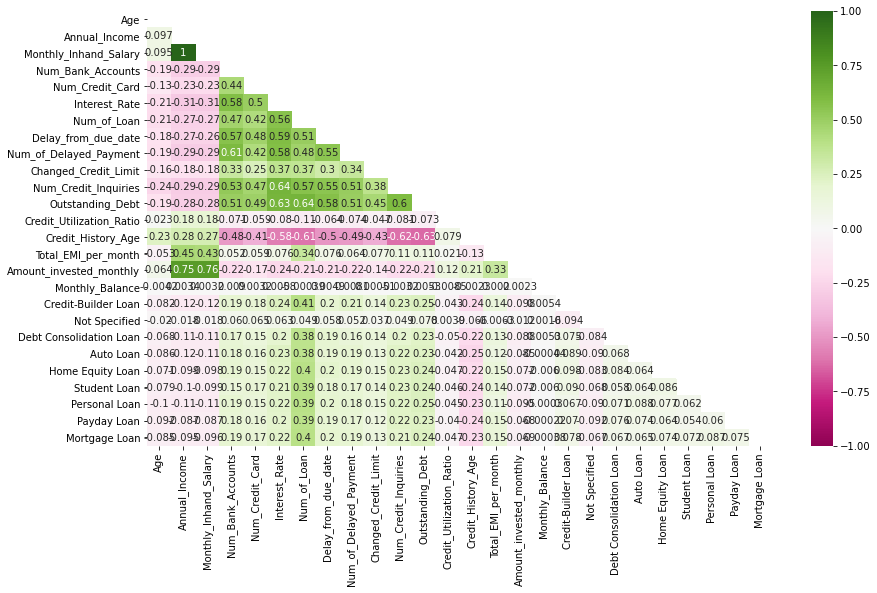

In [100]:
# Korelacja pomiędzy wartościami numerycznymi
plt.figure(figsize=(14,8))
sns.heatmap(
    dataset.corr(), 
    mask=np.triu(np.ones_like(dataset.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1, cmap="PiYG"
)

## Implementacja modeli

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import  roc_curve, roc_auc_score, auc
from sklearn.metrics import  precision_recall_curve, average_precision_score


from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import pickle
random_state=42

In [102]:
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,49000.0,NaN,NaN,NaN,33.223469,10.808923,14.0,24.0,33.0,42.0,56.0
Occupation,49000,15,Lawyer,3512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,49000.0,NaN,NaN,NaN,50766.448716,38437.967697,7006.52,19303.21,37131.02,72307.32,179987.28
Monthly_Inhand_Salary,49000.0,NaN,NaN,NaN,4221.191686,3203.402252,333.596667,1626.594167,3106.8475,6028.3225,15204.633333
Num_Bank_Accounts,49000.0,NaN,NaN,NaN,5.330122,2.613969,0.0,3.0,5.0,7.0,10.0
Num_Credit_Card,49000.0,NaN,NaN,NaN,5.52,2.05526,0.0,4.0,5.0,7.0,11.0
Interest_Rate,49000.0,NaN,NaN,NaN,14.473796,8.756447,1.0,7.0,13.0,20.0,34.0
Num_of_Loan,49000.0,NaN,NaN,NaN,3.546286,2.427222,0.0,2.0,3.0,5.0,9.0
Delay_from_due_date,49000.0,NaN,NaN,NaN,20.963612,14.838545,-4.0,10.0,18.0,28.0,62.0
Num_of_Delayed_Payment,49000.0,NaN,NaN,NaN,13.233204,6.309737,-2.0,9.0,14.0,18.0,28.0


In [103]:
#pliki zostały zapisane przez nas wcześniej do fromatu csv
train49 = pd.read_csv("train49.csv")
test21 = pd.read_csv("test21.csv")

In [104]:
X_train = train49.drop(columns="Credit_Score")
y_train = train49['Credit_Score']

X_test = test21.drop(columns="Credit_Score")
y_test = test21['Credit_Score']

In [105]:
from sklearn.preprocessing import OneHotEncoder

cat = X_train.select_dtypes(exclude="number").columns.to_list()    
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_train_cat = pd.DataFrame(
    enc.fit_transform(X_train[cat]), index = X_train.index, 
    columns = enc.get_feature_names_out(cat)
)   
X_test_cat  = pd.DataFrame(
    enc.transform(X_test[cat]), index = X_test.index, 
    columns = enc.get_feature_names_out(cat)
)
    
X_train_enc = X_train_cat.join(X_train.select_dtypes("number"))

X_test_enc = X_test_cat.join(X_test.select_dtypes("number"))

X_train_enc.shape, X_test_enc.shape

((49000, 63), (21000, 63))

In [106]:
X_train_enc.columns

Index(['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments',
       'Credit-Builder Loan_False', 'Credit-Builder Loan_True',
       'Not Specified_F

In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

pd.DataFrame(y_train).value_counts().sort_index()

0     8834
1    14126
2    26040
dtype: int64

In [108]:
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_enc), columns=X_train_enc.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test_enc), columns=X_test_enc.columns)

## Multinomial Logistic Regression 

In [109]:
log_model = LogisticRegression(
    class_weight = "balanced",
    random_state=random_state
)

In [110]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [111]:
y_pred_train = log_model.predict(X_train_scaled)
y_pred_test  = log_model.predict(X_test_scaled)
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.50      0.85      0.63      8834
           1       0.64      0.69      0.67     14126
           2       0.82      0.60      0.69     26040

    accuracy                           0.67     49000
   macro avg       0.66      0.71      0.66     49000
weighted avg       0.71      0.67      0.67     49000

              precision    recall  f1-score   support

           0       0.49      0.84      0.62      3818
           1       0.62      0.68      0.65      5886
           2       0.82      0.59      0.68     11296

    accuracy                           0.66     21000
   macro avg       0.64      0.70      0.65     21000
weighted avg       0.70      0.66      0.66     21000



## Random Forest

In [112]:
from sklearn.preprocessing import OrdinalEncoder

cat = X_train.select_dtypes(exclude="number").columns.to_list()    
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train[cat] = enc.fit_transform(X_train[cat])
X_test[cat] = enc.transform(X_test[cat])

X_train.shape, X_test.shape

((49000, 31), (21000, 31))

In [113]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(
    class_weight = 'balanced',
    random_state=random_state
)

In [114]:
%%time
rfc_model.fit(X_train, y_train)

Wall time: 13.1 s


RandomForestClassifier(class_weight='balanced', random_state=42)

In [115]:
y_pred_train = rfc_model.predict(X_train)
y_pred_test  = rfc_model.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8834
           1       1.00      1.00      1.00     14126
           2       1.00      1.00      1.00     26040

    accuracy                           1.00     49000
   macro avg       1.00      1.00      1.00     49000
weighted avg       1.00      1.00      1.00     49000

              precision    recall  f1-score   support

           0       0.56      0.55      0.55      3818
           1       0.74      0.63      0.68      5886
           2       0.72      0.78      0.75     11296

    accuracy                           0.69     21000
   macro avg       0.67      0.65      0.66     21000
weighted avg       0.69      0.69      0.69     21000



In [116]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(
    class_weight = 'balanced',
    random_state=random_state
)
param_grid = {
    'max_depth': [3], 
    'n_estimators': [10],
    'max_features': [None],
}

recall_poor = make_scorer(recall_score, average = None, labels=[1])
grid_model_rfc = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    scoring=recall_poor,
    refit=True,
#     verbose=2,
    n_jobs=-1,
    cv=5,
)

In [117]:
%%time
grid_model_rfc.fit(X_train, y_train)

Wall time: 4.43 s


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3], 'max_features': [None],
                         'n_estimators': [10]},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [118]:
grid_model_rfc.best_params_

{'max_depth': 3, 'max_features': None, 'n_estimators': 10}

In [119]:
grid_model_rfc.best_score_

0.7425316874283674

In [120]:
y_pred_train = grid_model_rfc.predict(X_train)
y_pred_test  = grid_model_rfc.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.49      0.84      0.62      8834
           1       0.64      0.74      0.69     14126
           2       0.85      0.57      0.69     26040

    accuracy                           0.67     49000
   macro avg       0.66      0.72      0.67     49000
weighted avg       0.73      0.67      0.68     49000

              precision    recall  f1-score   support

           0       0.48      0.82      0.61      3818
           1       0.61      0.72      0.66      5886
           2       0.84      0.57      0.68     11296

    accuracy                           0.66     21000
   macro avg       0.65      0.70      0.65     21000
weighted avg       0.71      0.66      0.66     21000



In [121]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    random_state=random_state,
)

In [122]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([1.84891706, 1.84891706, 1.84891706, ..., 1.15626032, 0.62724014,
       1.15626032])

In [123]:
comp = pd.DataFrame(classes_weights)

comp["label"] = pd.DataFrame(y_train).reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label  0       
0      1.848917     8834
1      1.156260    14126
2      0.627240    26040
Name: 0, dtype: int64

In [124]:
%%time
xgb_model.fit(
    X_train, y_train, 
    sample_weight=classes_weights
)


Wall time: 6.82 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [125]:
y_pred_train = xgb_model.predict(X_train)
y_pred_test  = xgb_model.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83      8834
           1       0.80      0.93      0.86     14126
           2       0.94      0.76      0.84     26040

    accuracy                           0.85     49000
   macro avg       0.82      0.88      0.84     49000
weighted avg       0.86      0.85      0.85     49000

              precision    recall  f1-score   support

           0       0.53      0.77      0.62      3818
           1       0.66      0.70      0.68      5886
           2       0.79      0.65      0.71     11296

    accuracy                           0.68     21000
   macro avg       0.66      0.70      0.67     21000
weighted avg       0.71      0.68      0.69     21000



In [126]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(
    random_state=random_state
)
param_grid = {
    'n_estimators':[50, 100],
}

recall_poor = make_scorer(recall_score, average = None, labels=[1])
grid_model_xgb = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    scoring=recall_poor,
    refit=True,
    n_jobs=-1
)

In [127]:
%%time
grid_model_xgb.fit(
    X_train, y_train, 
    sample_weight=classes_weights
)

Wall time: 34.1 s


GridSearchCV(error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lear...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1, param_grid={'n_estimators': [50, 100]},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [128]:
y_pred_train = grid_model_xgb.predict(X_train)
y_pred_test  = grid_model_xgb.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.62      0.91      0.74      8834
           1       0.76      0.86      0.81     14126
           2       0.91      0.70      0.79     26040

    accuracy                           0.79     49000
   macro avg       0.77      0.83      0.78     49000
weighted avg       0.82      0.79      0.79     49000

              precision    recall  f1-score   support

           0       0.52      0.80      0.63      3818
           1       0.66      0.72      0.69      5886
           2       0.82      0.62      0.71     11296

    accuracy                           0.68     21000
   macro avg       0.66      0.72      0.67     21000
weighted avg       0.72      0.68      0.69     21000



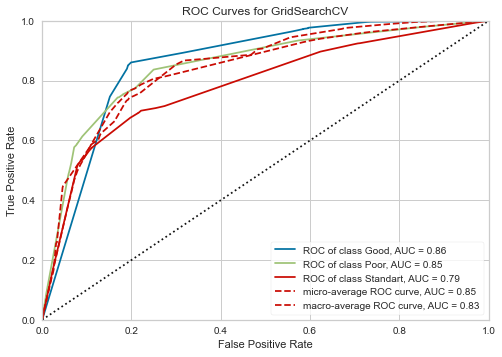

In [129]:
from yellowbrick.classifier import ROCAUC
model = grid_model_rfc

visualizer = ROCAUC(model, encoder={0: 'Good', 1: 'Poor', 2: 'Standart'})
visualizer.fit(X_train, y_train)        
visualizer.score(X_train, y_train)        
visualizer.show(); 

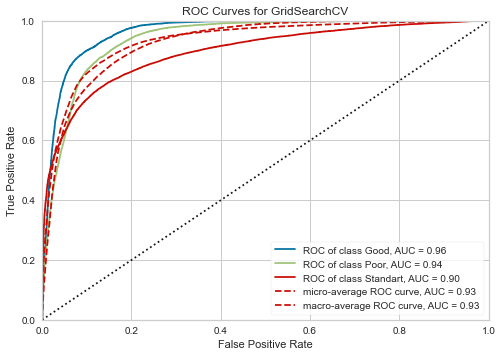

In [130]:
from yellowbrick.classifier import ROCAUC
model = grid_model_xgb

visualizer = ROCAUC(model, encoder={0: 'Good', 1: 'Poor', 2: 'Standart'})
visualizer.fit(X_train, y_train)        
visualizer.score(X_train, y_train)        
visualizer.show(); 

In [131]:
xgb_model.feature_importances_

array([0.01108775, 0.01238998, 0.01424056, 0.0146766 , 0.01650296,
       0.02218254, 0.03510967, 0.1366258 , 0.01713121, 0.01700434,
       0.01517068, 0.01975841, 0.01345825, 0.36586252, 0.08704165,
       0.00402297, 0.01077942, 0.01651358, 0.01933551, 0.01472566,
       0.01002159, 0.00603411, 0.01406501, 0.01389461, 0.0123483 ,
       0.01563402, 0.01045423, 0.01112448, 0.01116001, 0.01548799,
       0.01615562], dtype=float32)

<BarContainer object of 31 artists>

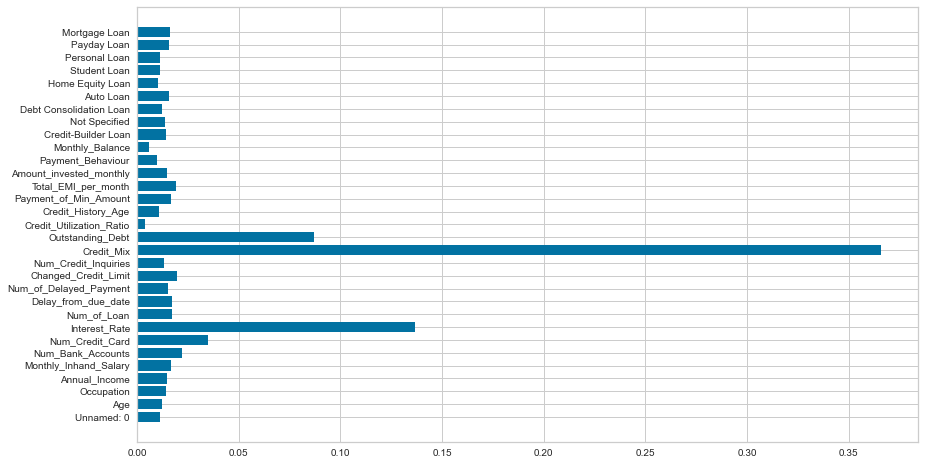

In [132]:
plt.figure(figsize=(14,8))
plt.barh(X_test.columns, xgb_model.feature_importances_)

In [133]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(xgb_model, X_test, y_test)
perm_importance

{'importances_mean': array([ 7.04761905e-04,  1.54285714e-03,  8.00000000e-04,  1.81904762e-03,
         5.04761905e-04,  5.02857143e-03,  1.43809524e-02,  7.93904762e-02,
         3.83809524e-03,  2.76095238e-02,  5.24761905e-03,  9.25714286e-03,
         6.27619048e-03,  1.34114286e-01,  4.43523810e-02,  1.23809524e-04,
         1.40571429e-02,  1.41904762e-03,  1.04476190e-02,  3.00952381e-03,
         1.62857143e-03,  1.18095238e-03,  2.85714286e-05, -5.04761905e-04,
         4.38095238e-04, -7.61904762e-05, -6.09523810e-04,  1.04761905e-04,
         9.52380952e-05,  4.38095238e-04, -7.04761905e-04]),
 'importances_std': array([6.32742295e-04, 3.05059379e-04, 8.51515922e-04, 7.63331997e-04,
        1.45486906e-03, 5.15166794e-04, 1.62519840e-03, 3.89662334e-04,
        6.12492769e-04, 1.55194268e-03, 5.98107370e-04, 7.81648934e-04,
        8.76190476e-04, 2.23852073e-03, 1.66342542e-03, 3.48107941e-04,
        1.14380913e-03, 3.03270159e-04, 9.06314457e-04, 1.39529498e-03,
        

Text(0.5, 0, 'Permutation Importance')

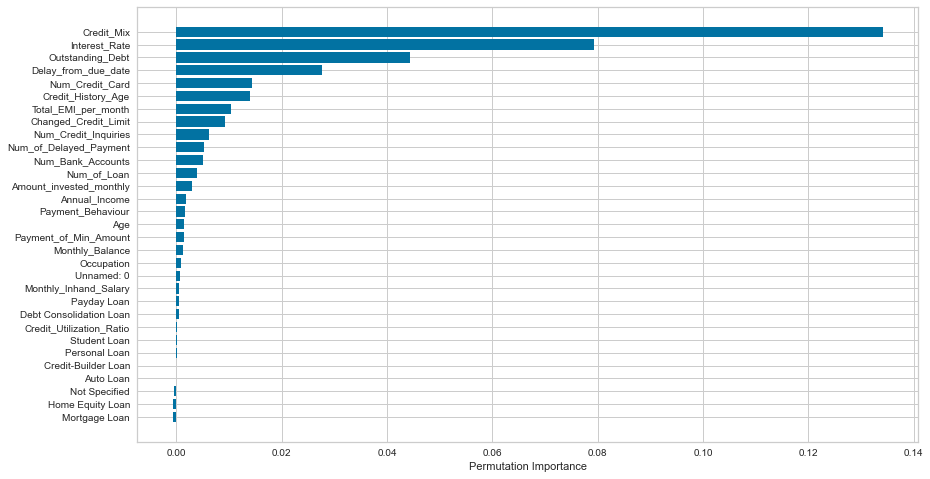

In [134]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(14,8))
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [135]:
X_test.columns

Index(['Unnamed: 0', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit-Builder Loan', 'Not Specified', 'Debt Consolidation Loan',
       'Auto Loan', 'Home Equity Loan', 'Student Loan', 'Personal Loan',
       'Payday Loan', 'Mortgage Loan'],
      dtype='object')

In [136]:
X_train = X_train[['Credit_Mix', 'Interest_Rate', 'Outstanding_Debt', 'Num_Credit_Card', 'Credit_History_Age',
                  'Total_EMI_per_month', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Num_Bank_Accounts', 'Num_of_Delayed_Payment']]
X_test = X_test[['Credit_Mix', 'Interest_Rate', 'Outstanding_Debt', 'Num_Credit_Card', 'Credit_History_Age',
                  'Total_EMI_per_month', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Num_Bank_Accounts', 'Num_of_Delayed_Payment']]

In [137]:
le = LabelEncoder()
y = le.fit_transform(y_train)

In [138]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y)
classes_weights

array([1.84891706, 1.84891706, 1.84891706, ..., 1.15626032, 0.62724014,
       1.15626032])

In [139]:
final_model = XGBClassifier(
    random_state=random_state,
)

In [140]:
%%time
final_model.fit(
    X_train, y_train, 
    sample_weight=classes_weights
)

Wall time: 2.51 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [141]:
y_pred_train = final_model.predict(X_train)
y_pred_test  = final_model.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77      8834
           1       0.78      0.89      0.83     14126
           2       0.92      0.72      0.81     26040

    accuracy                           0.81     49000
   macro avg       0.79      0.85      0.80     49000
weighted avg       0.83      0.81      0.81     49000

              precision    recall  f1-score   support

           0       0.50      0.77      0.60      3818
           1       0.64      0.67      0.65      5886
           2       0.80      0.63      0.70     11296

    accuracy                           0.67     21000
   macro avg       0.64      0.69      0.65     21000
weighted avg       0.70      0.67      0.67     21000



# Drugie podejście z randomowym podziałem rekordów na koniec preprocessingu

In [142]:
traintest = pd.read_csv("traintest70.csv")

In [143]:
X = traintest.drop(columns="Credit_Score")
y = traintest['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

X_train.shape, X_test.shape, y_train.shape

((49000, 31), (21000, 31), (49000,))

In [144]:
X_train_enc.columns

Index(['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments',
       'Credit-Builder Loan_False', 'Credit-Builder Loan_True',
       'Not Specified_F

In [145]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

pd.DataFrame(y_train).value_counts().sort_index()

0     8856
1    13986
2    26158
dtype: int64

In [146]:
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_enc), columns=X_train_enc.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test_enc), columns=X_test_enc.columns)

## Multinomial Logistic Regression 

In [147]:
log_model = LogisticRegression(
    class_weight = "balanced",
    random_state=random_state
)

In [148]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [149]:
y_pred_train = log_model.predict(X_train_scaled)
y_pred_test  = log_model.predict(X_test_scaled)
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.19      0.37      0.25      8856
           1       0.30      0.33      0.32     13986
           2       0.55      0.34      0.42     26158

    accuracy                           0.35     49000
   macro avg       0.35      0.35      0.33     49000
weighted avg       0.42      0.35      0.36     49000

              precision    recall  f1-score   support

           0       0.19      0.36      0.24      3796
           1       0.28      0.29      0.29      6026
           2       0.53      0.35      0.42     11178

    accuracy                           0.34     21000
   macro avg       0.33      0.33      0.32     21000
weighted avg       0.40      0.34      0.35     21000



Jak widać wyniki dla regresji logistycznej są niezwykle niskie :L

## Random Forest

In [150]:
from sklearn.preprocessing import OrdinalEncoder

cat = X_train.select_dtypes(exclude="number").columns.to_list()    
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train[cat] = enc.fit_transform(X_train[cat])
X_test[cat] = enc.transform(X_test[cat])

X_train.shape, X_test.shape

((49000, 31), (21000, 31))

In [151]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(
    class_weight = 'balanced',
    random_state=random_state
)

In [152]:
%%time
rfc_model.fit(X_train, y_train)

Wall time: 14.9 s


RandomForestClassifier(class_weight='balanced', random_state=42)

In [153]:
y_pred_train = rfc_model.predict(X_train)
y_pred_test  = rfc_model.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8856
           1       1.00      1.00      1.00     13986
           2       1.00      1.00      1.00     26158

    accuracy                           1.00     49000
   macro avg       1.00      1.00      1.00     49000
weighted avg       1.00      1.00      1.00     49000

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      3796
           1       0.81      0.84      0.82      6026
           2       0.83      0.82      0.83     11178

    accuracy                           0.82     21000
   macro avg       0.81      0.81      0.81     21000
weighted avg       0.82      0.82      0.82     21000



In [154]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(
    class_weight = 'balanced',
    random_state=random_state
)
param_grid = {
    'max_depth': [3], 
    'n_estimators': [10],
    'max_features': [None],
}

recall_poor = make_scorer(recall_score, average = None, labels=[1])
grid_model_rfc = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    scoring=recall_poor,
    refit=True,
#     verbose=2,
    n_jobs=-1,
    cv=5,
)

In [155]:
%%time
grid_model_rfc.fit(X_train, y_train)

Wall time: 3.89 s


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3], 'max_features': [None],
                         'n_estimators': [10]},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [156]:
grid_model_rfc.best_params_

{'max_depth': 3, 'max_features': None, 'n_estimators': 10}

In [157]:
grid_model_rfc.best_score_

0.7378806251873561

In [158]:
y_pred_train = grid_model_rfc.predict(X_train)
y_pred_test  = grid_model_rfc.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.49      0.84      0.62      8856
           1       0.63      0.74      0.68     13986
           2       0.85      0.57      0.68     26158

    accuracy                           0.67     49000
   macro avg       0.66      0.71      0.66     49000
weighted avg       0.72      0.67      0.67     49000

              precision    recall  f1-score   support

           0       0.49      0.83      0.62      3796
           1       0.64      0.74      0.69      6026
           2       0.85      0.58      0.69     11178

    accuracy                           0.67     21000
   macro avg       0.66      0.72      0.66     21000
weighted avg       0.73      0.67      0.67     21000



In [159]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    random_state=random_state,
)

In [160]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.62441063, 1.844324  , 1.844324  , ..., 0.62441063, 1.844324  ,
       1.844324  ])

In [161]:
comp = pd.DataFrame(classes_weights)

comp["label"] = pd.DataFrame(y_train).reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label  0       
0      1.844324     8856
1      1.167835    13986
2      0.624411    26158
Name: 0, dtype: int64

In [162]:
%%time
xgb_model.fit(
    X_train, y_train, 
    sample_weight=classes_weights
)


Wall time: 8.25 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [163]:
y_pred_train = xgb_model.predict(X_train)
y_pred_test  = xgb_model.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.69      0.94      0.80      8856
           1       0.79      0.91      0.84     13986
           2       0.93      0.74      0.83     26158

    accuracy                           0.83     49000
   macro avg       0.80      0.86      0.82     49000
weighted avg       0.85      0.83      0.83     49000

              precision    recall  f1-score   support

           0       0.63      0.87      0.73      3796
           1       0.76      0.85      0.80      6026
           2       0.88      0.71      0.79     11178

    accuracy                           0.78     21000
   macro avg       0.76      0.81      0.77     21000
weighted avg       0.80      0.78      0.78     21000



In [164]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(
    random_state=random_state
)
param_grid = {
    'n_estimators':[50, 100],
}

recall_poor = make_scorer(recall_score, average = None, labels=[1])
grid_model_xgb = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    scoring=recall_poor,
    refit=True,
    n_jobs=-1
)

In [165]:
%%time
grid_model_xgb.fit(
    X_train, y_train, 
    sample_weight=classes_weights
)

Wall time: 42.7 s


GridSearchCV(error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lear...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1, param_grid={'n_estimators': [50, 100]},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [166]:
y_pred_train = grid_model_xgb.predict(X_train)
y_pred_test  = grid_model_xgb.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.69      0.94      0.80      8856
           1       0.79      0.91      0.84     13986
           2       0.93      0.74      0.83     26158

    accuracy                           0.83     49000
   macro avg       0.80      0.86      0.82     49000
weighted avg       0.85      0.83      0.83     49000

              precision    recall  f1-score   support

           0       0.63      0.87      0.73      3796
           1       0.76      0.85      0.80      6026
           2       0.88      0.71      0.79     11178

    accuracy                           0.78     21000
   macro avg       0.76      0.81      0.77     21000
weighted avg       0.80      0.78      0.78     21000



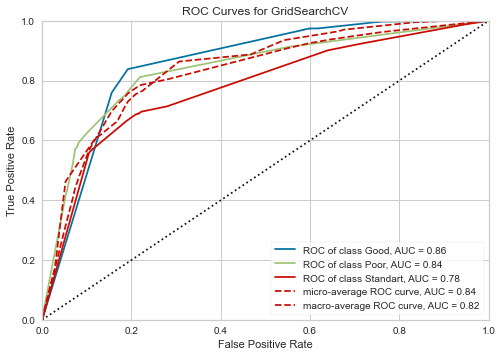

In [167]:
from yellowbrick.classifier import ROCAUC
model = grid_model_rfc

visualizer = ROCAUC(model, encoder={0: 'Good', 1: 'Poor', 2: 'Standart'})
visualizer.fit(X_train, y_train)      
visualizer.score(X_train, y_train)      
visualizer.show(); 

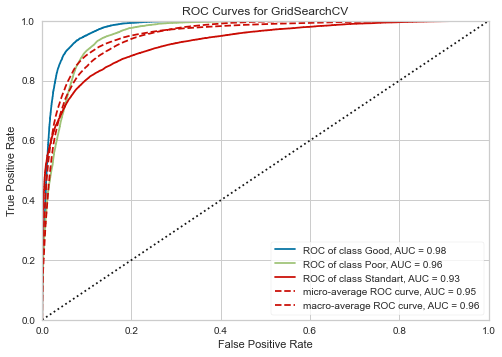

In [168]:
from yellowbrick.classifier import ROCAUC
model = grid_model_xgb

visualizer = ROCAUC(model, encoder={0: 'Good', 1: 'Poor', 2: 'Standart'})
visualizer.fit(X_train, y_train)       
visualizer.score(X_train, y_train)       
visualizer.show(); 

In [169]:
xgb_model.feature_importances_

array([0.01130058, 0.01179084, 0.01085768, 0.01330888, 0.0145419 ,
       0.02178514, 0.0349045 , 0.13285424, 0.01584651, 0.01534923,
       0.01582977, 0.01879014, 0.01297658, 0.3898086 , 0.08970367,
       0.00466526, 0.01151394, 0.01710656, 0.01800333, 0.0132338 ,
       0.0097012 , 0.00673736, 0.01345253, 0.01093479, 0.01140542,
       0.01391775, 0.01148457, 0.01310266, 0.01090095, 0.01358508,
       0.0106066 ], dtype=float32)

<BarContainer object of 31 artists>

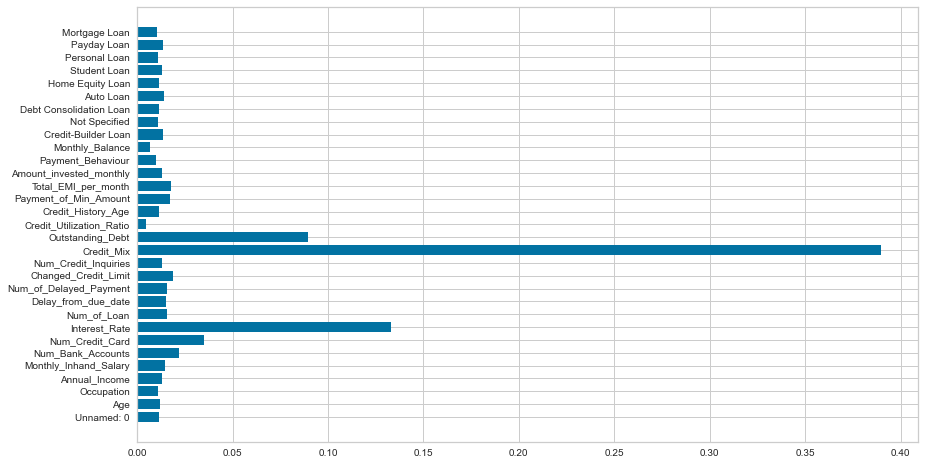

In [170]:
plt.figure(figsize=(14,8))
plt.barh(X_test.columns, xgb_model.feature_importances_)

In [171]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(xgb_model, X_test, y_test)
perm_importance

{'importances_mean': array([ 0.02274286,  0.00870476,  0.00647619,  0.0166    ,  0.01972381,
         0.01632381,  0.01889524,  0.08657143,  0.00099048,  0.04318095,
         0.01755238,  0.03577143,  0.01248571,  0.15414286,  0.07167619,
         0.00045714,  0.01775238, -0.00284762,  0.03189524,  0.02017143,
         0.00565714,  0.00887619,  0.00089524,  0.00124762,  0.00090476,
         0.00070476,  0.00059048,  0.00094286,  0.00131429,  0.00086667,
         0.00035238]),
 'importances_std': array([0.0006792 , 0.00036316, 0.00033806, 0.00112792, 0.00155282,
        0.0004998 , 0.00131152, 0.00191829, 0.00132014, 0.00196371,
        0.00101087, 0.00086891, 0.00052286, 0.00172956, 0.00196717,
        0.00048804, 0.0008206 , 0.00038024, 0.00082994, 0.00066639,
        0.00108813, 0.00082347, 0.0002527 , 0.00020293, 0.00027105,
        0.00035302, 0.00020113, 0.00038498, 0.00021423, 0.00042099,
        0.00037204]),
 'importances': array([[ 2.19523810e-02,  2.31428571e-02,  2.29047619e

Text(0.5, 0, 'Permutation Importance')

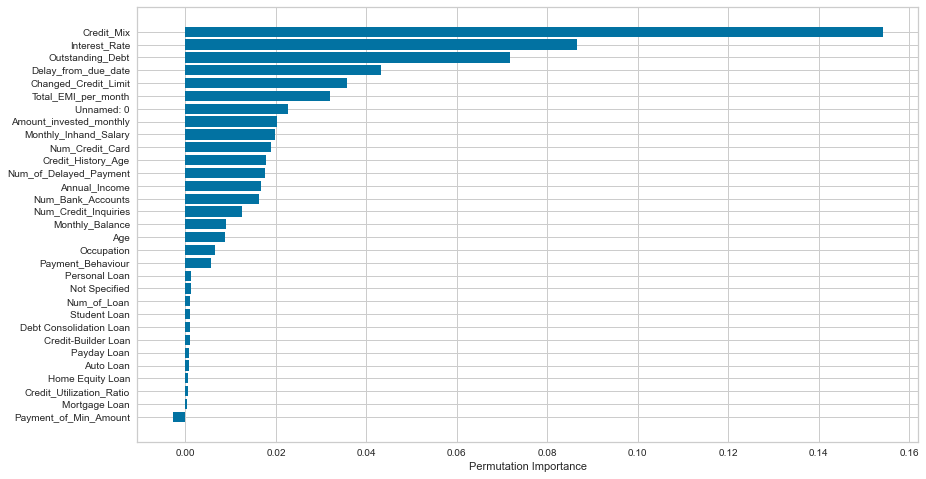

In [172]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(14,8))
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [173]:
X_test.columns

Index(['Unnamed: 0', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit-Builder Loan', 'Not Specified', 'Debt Consolidation Loan',
       'Auto Loan', 'Home Equity Loan', 'Student Loan', 'Personal Loan',
       'Payday Loan', 'Mortgage Loan'],
      dtype='object')

In [174]:
X_train = X_train[['Credit_Mix', 'Interest_Rate', 'Outstanding_Debt', 'Num_Credit_Card', 'Credit_History_Age',
                  'Total_EMI_per_month', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Num_Bank_Accounts', 'Num_of_Delayed_Payment']]
X_test = X_test[['Credit_Mix', 'Interest_Rate', 'Outstanding_Debt', 'Num_Credit_Card', 'Credit_History_Age',
                  'Total_EMI_per_month', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Num_Bank_Accounts', 'Num_of_Delayed_Payment']]

In [175]:
le = LabelEncoder()
y = le.fit_transform(y_train)

In [176]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y)
classes_weights

array([0.62441063, 1.844324  , 1.844324  , ..., 0.62441063, 1.844324  ,
       1.844324  ])

In [177]:
final_model = XGBClassifier(
    random_state=random_state,
)

In [178]:
%%time
final_model.fit(
    X_train, y_train, 
    sample_weight=classes_weights
)

Wall time: 3.1 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [179]:
y_pred_train = final_model.predict(X_train)
y_pred_test  = final_model.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.63      0.91      0.74      8856
           1       0.76      0.87      0.81     13986
           2       0.91      0.70      0.79     26158

    accuracy                           0.79     49000
   macro avg       0.77      0.83      0.78     49000
weighted avg       0.82      0.79      0.79     49000

              precision    recall  f1-score   support

           0       0.59      0.86      0.70      3796
           1       0.74      0.83      0.78      6026
           2       0.88      0.68      0.77     11178

    accuracy                           0.76     21000
   macro avg       0.73      0.79      0.75     21000
weighted avg       0.79      0.76      0.76     21000

